# Librerías

In [1]:
import numpy as np
import pandas as pd
import os
import pydicom
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

# Lectura del dataset 

In [2]:
df = pd.read_csv("../data/stage_2_train_labels.csv")
df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


Comprobaciones sobre el número de registros y si hay elementos duplicados

In [3]:
num_filas = len(df)
num_patientId_unicos = len(np.unique(df["patientId"]))
num_duplicados = num_filas - num_patientId_unicos

print("El número de registros es: " + str(num_filas))
print("El número de patientId únicos es: " + str(num_patientId_unicos))
print("El número de duplicados es: " + str(num_duplicados))


El número de registros es: 30227
El número de patientId únicos es: 26684
El número de duplicados es: 3543


Vamos a identificar esos duplicados y eliminarlos

In [4]:
df_duplicados = df[df.duplicated(["patientId"])]
df_duplicados.head()

,patientId,x,y,width,height,Target
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
15,00aecb01-a116-45a2-956c-08d2fa55433f,547.0,299.0,119.0,165.0,1
17,00c0b293-48e7-4e16-ac76-9269ba535a62,650.0,511.0,206.0,284.0,1
20,00f08de1-517e-4652-a04f-d1dc9ee48593,571.0,275.0,230.0,476.0,1


In [5]:
df[df["patientId"] == "00704310-78a8-4b38-8475-49f4573b2dbb"]

,patientId,x,y,width,height,Target
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


Como podemos comprobar hay registros que están duplicados para una misma imagen, esto se entiende a priori que está bien porque un registro indica que hay neumonía en un pulmón, y el otro registro que también hay pulmonía en el otro.

En nuestro caso, tenemos un imagen que queremos clasificar si el target es 1 o 0, pero nos da igual si hay una neumonía en un pulmón, en los dos o en ninguno, es decir, solo nos importa el `patientId` (indica el paciente y la imagen correspondiente) y la variable objetivo `Target` (1 indica que hay neumonía y 0 en caso contrario).

Por lo tanto, vamos a quedarnos con el primer elemnto duplicado, el segundo lo eliminamos del dataset.

In [6]:
df = df.drop_duplicates(subset="patientId")
df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [7]:
num_filas = len(df)
num_patientId_unicos = len(np.unique(df["patientId"]))
num_duplicados = num_filas - num_patientId_unicos

print("El número de registros es: " + str(num_filas))
print("El número de patientId únicos es: " + str(num_patientId_unicos))
print("El número de duplicados es: " + str(num_duplicados))

El número de registros es: 26684
El número de patientId únicos es: 26684
El número de duplicados es: 0


El siguiente paso es eliminar las columnas innecesasrias, es decir, solo nos hace falta el `patientId` para saber qué paciente es y qué imagen hay que usar, y la variable `Target` para saber si en la imagen hay neumonía o no.

In [8]:
df = df.iloc[:, [0,5]]
print("El número de registros es: " + str(len(df)))
df.head()

El número de registros es: 26684


,patientId,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0
4,00436515-870c-4b36-a041-de91049b9ab4,1


# Split conjunto de train, test y validation

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df["patientId"], df["Target"], test_size=3000)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=3000)

In [10]:
print("Las dimensiones de X_train son: " + str(X_train.shape))
print("Las dimensiones de y_train son: " + str(y_train.shape))
print("Las dimensiones de X_validation son: " + str(X_validation.shape))
print("Las dimensiones de y_validation son: " + str(y_validation.shape))
print("Las dimensiones de X_test sonn: " + str(X_test.shape))
print("Las dimensiones de y_test sonn: " + str(y_test.shape))

Las dimensiones de X_train son: (20684,)
Las dimensiones de y_train son: (20684,)
Las dimensiones de X_validation son: (3000,)
Las dimensiones de y_validation son: (3000,)
Las dimensiones de X_test sonn: (3000,)
Las dimensiones de y_test sonn: (3000,)


# Transformar las imágenes de dicom a png

En este apartado se va a transformar la imágenes de dicom a png, básicamente para que no comprima la imagen y sea más fácil de trabajar con ella.

La estructura de carpetas que se van a generar son las siguientes:
* train_images: contiene las imágenes del conjunto de train.
* validation_images: contiene las imágenes del conjunto de validation.
* test_images: contiene las imágenes del conjunto de test.

Lo primero de todo es crear las carpeta correspondientes:

In [11]:
# Creación de los directorios
os.mkdir("../data/preprocessed_dataset/train_images")
os.mkdir("../data/preprocessed_dataset/validation_images")
os.mkdir("../data/preprocessed_dataset/test_images")

Lo siguiente es definir una función para que vaya recorriendo la imágenes, las transforme y las almacene en el directorio correspondiente:

In [12]:
def transform_dcm_png(images, mode="train"):
    path = ""
    root = "../data/stage_2_train_images/"
    
    if mode == "train":
        path = "../data/preprocessed_dataset/train_images"
    if mode == "validation":
        path =  "../data/preprocessed_dataset/validation_images"
    if mode == "test":
        path = "../data/preprocessed_dataset/test_images"
    
    # Empieza la transformación
    for image in images:
        img = pydicom.dcmread(os.path.join(root, image + ".dcm")).pixel_array
        img_save = Image.fromarray(img)
        img_save.save(os.path.join(path, image + ".png"))
        
transform_dcm_png(images=X_train.values, mode="train")
transform_dcm_png(images=X_validation.values, mode="validation")
transform_dcm_png(images=X_test.values, mode="test")

In [13]:
def check_transform(images, mode="train"):
    files = []
    
    if mode == "train":
        files = os.listdir("../data/preprocessed_dataset/train_images")
    if mode == "validation":
        files = os.listdir("../data/preprocessed_dataset/validation_images")
    if mode == "test":
        files = os.listdir("../data/preprocessed_dataset/test_images")
        
    for image in images:
        if not image + ".png" in files:
            return False
    return True

print("Train: " + str(check_transform(images=X_train.values, mode="train")))
print("Validation: " + str(check_transform(images=X_validation.values, mode="validation")))
print("Test: " + str(check_transform(images=X_test.values, mode="test")))

Train: True
Validation: True
Test: True


# Comprobar el balance de datos

Comprobamos el número de muestras que hay en el conjunto de train sin neumonía y con neumonía. Además, calculamos la proporción.

In [14]:
print("El número de muestras sin neumonía es: " + str(np.count_nonzero(y_train == 0)))
print("El número de muestras con neumonía es: " + str(np.count_nonzero(y_train == 1)))

El número de muestras sin neumonía es: 16072
El número de muestras con neumonía es: 4612


In [15]:
proportion = round(np.count_nonzero(y_train == 0) / np.count_nonzero(y_train == 1), 2)
print("La proporción es: " + str(proportion))

La proporción es: 3.48


Por cada imágenes con neumonía hay aproximadamente 3.5 imágenes sin neumonía. Por lo tanto, vemos que hay un claro desbalanceo entre clases.

Para solventar este problema vamos a realizar un aumento de datos de la clase minoritaría, en nuestro caso, de las imágenes con neumonía.

Inicialmente lo que se va a hacer va a ser aumentar tantas imágenes como sea la diferencia con la proporción, es decir, si la proporción es 3.4 (se van a crear 3 - 1 = 2 imágenes aumentadas por cada imagen con neumonía). Finalmente, se volverá a recorrer cada imágen con neumonía y calcular una imágenes aumentada hasta que haya un claro balanceo de datos.

In [16]:
def image_data_generator(img, batch_size=20):
    # Data augmentation
    images = []
    img_gen = ImageDataGenerator(samplewise_center=False, 
                                 samplewise_std_normalization=False, 
                                 horizontal_flip = True, 
                                 vertical_flip = False, 
                                 height_shift_range = 0.05, 
                                 width_shift_range = 0.02, 
                                 rotation_range = 3, 
                                 shear_range = 0.01,
                                 fill_mode = 'nearest',
                                 zoom_range = 0.05)

    img = img.reshape(1,1024,1024,1) # (1, dim1, dim2, canal)

    it = img_gen.flow(img, batch_size=1)

    for i in range(batch_size):
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        image = image.reshape(1024,1024)
        # add to list
        images.append(image)
        
    return images[np.random.randint(low=0, high=batch_size)]

In [17]:
def data_balancing(X_train, y_train, proportion):
    X = np.copy(X_train)
    y = np.copy(y_train)
    indices = np.where(y == 1)[0]
    proportion = int(proportion)
    root = "../data/preprocessed_dataset/train_images"
    
    # 1ª Data augmentation
    # Tantas imágenes aumentadas como número de proporción, si la proporción es 3.7 se generan 3 - 1 = 2 imágenes nuevas
    for index in indices:
        img = np.array(Image.open(os.path.join(root, X[index] + ".png")))
        img_name = X[index] + "#a"
        for rep in range(proportion - 1):
            augmented_image = image_data_generator(img)
            img_save = Image.fromarray(augmented_image)
            img_save.save(os.path.join(root, img_name + str(rep) + ".png"))
            X = np.append(X, img_name + str(rep))
            y = np.append(y, 1)
            
    # 2º Data augmentation
    # Se va a crear una imágen aumentada de forma aleatoria hasta balancear las clases
    # En este caso solo se crea una imágen aumentada por cada imágen hasta balancear las clases
    repetitions = np.count_nonzero(y_train == 0) - np.count_nonzero(y_train == 1)
    visited = []
    
    for rep in range(repetitions):
        index = indices[np.random.randint(low=0, high=indices.shape[0])]
        while index in visited:
            index = indices[np.random.randint(low=0, high=indices.shape[0])]
        img = np.array(Image.open(os.path.join(root, X[index] + ".png")))
        img_name = X[index] + "#b"
        
        # Creación de la imagen
        augmented_image = image_data_generator(img)
        img_save = Image.fromarray(augmented_image)
        img_save.save(os.path.join(root, img_name + ".png"))
        X = np.append(X, img_name)
        y = np.append(y, 1)
        
        # Guardamos el paciente visitado
        visited.append(index)
        
    return X, y

In [18]:
X_train_augmented, y_train_augmented = data_balancing(X_train, y_train, proportion)

KeyboardInterrupt: 

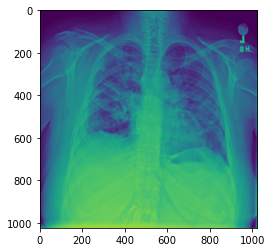

In [26]:
im = Image.open('../data/preprocessed_dataset/train_images/65c77a9f-d874-47b4-83c8-3468e5100908.png')
im = np.array(im)
plt.imshow(im)